<a href="https://colab.research.google.com/github/AleFax99/DeepLearning_GroupProject/blob/main/DL_Assignment_baseline_2__IN_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [ ]:
#Helloo 
# hellooooo


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
!pwd

/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project


In [3]:
import json
import numpy as np
import glob
import pandas as pd

# importing modules
import urllib.request
from PIL import Image
from keras import layers, models
import tensorflow as tf

In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")
# print(type(imageNames))
# print(len(imageNames))
# print(imageNames)

<class 'list'>
6513
['./all-images/1676364.json', './all-images/1676362.json', './all-images/1676365.json', './all-images/1676360.json', './all-images/1676363.json', './all-images/1676367.json', './all-images/1676369.json', './all-images/1676368.json', './all-images/1676361.json', './all-images/1676377.json', './all-images/1676374.json', './all-images/1676375.json', './all-images/1676371.json', './all-images/1676378.json', './all-images/1676376.json', './all-images/1676373.json', './all-images/1676372.json', './all-images/1676370.json', './all-images/1676382.json', './all-images/1676385.json', './all-images/1676379.json', './all-images/1676387.json', './all-images/1676380.json', './all-images/1676384.json', './all-images/1676383.json', './all-images/1676388.json', './all-images/1676389.json', './all-images/1676381.json', './all-images/1676386.json', './all-images/1676392.json', './all-images/1676396.json', './all-images/1676391.json', './all-images/1676393.json', './all-images/1676390.

In [ ]:

# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")

# dataset = []
# labels = []

# for i, imName in enumerate(imageNames):

#     # Opening JSON file
#     f = open(imName)
#     data = json.load(f)
#     for j in range(len(data['annotations'])):

#         if 'COVID-19' in (data['annotations'][j]['name']):
#           #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             print(label)
#             break

#         if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
#             or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
#             or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
#             #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             break

# #Convert data shape of (n_of_samples, width, height, 1)
# dataset = np.dstack(dataset)    
# dataset = np.rollaxis(dataset,-1)
# labels = np.array(labels)

# #convert images gray scale to rgb
# data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# # save data and labels into a folder
# np.save("./data.npy", data)
# np.save("./labels.npy", labels)

COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
COVID-19
C

Once you save your data, you can load it from your directory.

In [70]:
import numpy as np

data = np.load('./data.npy')
labels = np.load('./labels.npy')

# Preprocessing Steps



## Splitting Data

In [71]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, stratify= y_train_val , random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


## Normalize Data

In [72]:
# from skimage import io, color
# import matplotlib.pyplot as plt
# %matplotlib inline
# from skimage.filters import threshold_otsu

# data_list = []
# for im in X_train: 
# # read image from disk, provide the correct path 
# # convert to float
#   im = im.astype(float)                
# # normarlize the intensity values a range between 0 and 1
#   im = im-im.min()                    
#   im = im/im.max()
#   data_list.append(im)

# normalize to range 0-1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0
  
print(X_train[0])

[[[0.09019608 0.09019608 0.09019608]
  [0.09019608 0.09019608 0.09019608]
  [0.09019608 0.09019608 0.09019608]
  ...
  [0.0745098  0.0745098  0.0745098 ]
  [0.0627451  0.0627451  0.0627451 ]
  [0.05098039 0.05098039 0.05098039]]

 [[0.08627451 0.08627451 0.08627451]
  [0.08627451 0.08627451 0.08627451]
  [0.08627451 0.08627451 0.08627451]
  ...
  [0.06666667 0.06666667 0.06666667]
  [0.05490196 0.05490196 0.05490196]
  [0.04313725 0.04313725 0.04313725]]

 [[0.10588235 0.10588235 0.10588235]
  [0.08235294 0.08235294 0.08235294]
  [0.08235294 0.08235294 0.08235294]
  ...
  [0.0627451  0.0627451  0.0627451 ]
  [0.04705882 0.04705882 0.04705882]
  [0.0627451  0.0627451  0.0627451 ]]

 ...

 [[0.09019608 0.09019608 0.09019608]
  [0.08627451 0.08627451 0.08627451]
  [0.08627451 0.08627451 0.08627451]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01568627 0.01568627 0.01568627]]

 [[0.08627451 0.08627451 0.08627451]
  [0.08627451 0.08627451 0.08627451]


In [61]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3840, 156, 156, 3)
(1280, 156, 156, 3)
(1281, 156, 156, 3)


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train.shape

(3840,)

In [73]:
y_train

array(['Bacterial Pneumonia', 'Bacterial Pneumonia',
       'Bacterial Pneumonia', ..., 'Bacterial Pneumonia',
       'Bacterial Pneumonia', 'Bacterial Pneumonia'], dtype='<U22')

In [74]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# y_train_enc = enc.fit_transform(y_train)

# print(y_train_enc[0])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# from sklearn.preprocessing import LabelBinarizer
# label_binarizer = LabelBinarizer().fit(y_train)
# y_onehot_val = label_binarizer.transform(y_val)
# y_onehot_test = label_binarizer.transform(y_test)
# y_onehot_test.shape  # (n_samples, n_classes)

In [63]:
le.classes_

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

In [75]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [77]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Create Baseline Model

In [78]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


model = Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', 
                        input_shape = (156,156,3), padding="same"))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))


In [79]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 156, 156, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 78, 78, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                  

In [80]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val)
)



Epoch 1/10
120/120 [==============================] - 13s 74ms/step - loss: 0.9208 - accuracy: 0.5701 - val_loss: 0.6757 - val_accuracy: 0.7180
Epoch 2/10
120/120 [==============================] - 8s 66ms/step - loss: 0.6471 - accuracy: 0.7372 - val_loss: 0.5972 - val_accuracy: 0.7547
Epoch 3/10
120/120 [==============================] - 8s 65ms/step - loss: 0.5560 - accuracy: 0.7661 - val_loss: 0.6301 - val_accuracy: 0.7359
Epoch 4/10
120/120 [==============================] - 8s 66ms/step - loss: 0.5007 - accuracy: 0.7875 - val_loss: 0.5619 - val_accuracy: 0.7688
Epoch 5/10
120/120 [==============================] - 8s 67ms/step - loss: 0.4716 - accuracy: 0.8010 - val_loss: 0.6085 - val_accuracy: 0.7805
Epoch 6/10
120/120 [==============================] - 8s 66ms/step - loss: 0.4059 - accuracy: 0.8299 - val_loss: 0.5796 - val_accuracy: 0.7805
Epoch 7/10
120/120 [==============================] - 8s 67ms/step - loss: 0.3381 - accuracy: 0.8544 - val_loss: 0.6957 - val_accuracy: 0.798

# Analyze the performance of the baseline model

In [81]:
test_loss, test_acc = model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 18ms/step - loss: 0.9716 - accuracy: 0.7377


# Plots

## Training and validation losses and accuracies on the training and validation set

In [82]:
from matplotlib import pyplot as plt

def summarize_diagnostics(history):
  # Loss Function
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend(['training', 'validation'])
  # Accuracy Score
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.legend(['training', 'validation'])
  plt.tight_layout()
  plt.show()

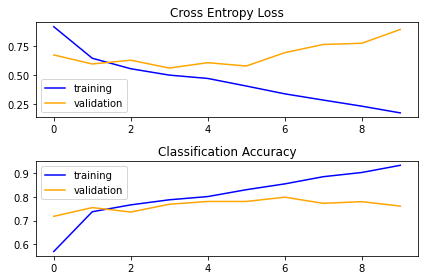

In [83]:
summarize_diagnostics(history)

In [ ]:
# from matplotlib import pyplot as plt
# fig, ax = plt.subplots(2)

# # plot loss
# ax[0].plot(history.history['epochs'], history.history['loss'], color='blue', label='train')
# ax[0].plot(history.history['epochs'], history.history['val_loss'], color='orange', label='test')
# ax[0].legend()

# # plot accuracy
# ax[1].plot(history.history['epochs'], history.history['accuracy'], color='blue', label='train')
# ax[1].plot(history.history['epochs'], history.history['val_accuracy'], color='orange', label='test')
# ax[0].legend()

# fig.tight_layout()
# plt.show()

## Receiver Operator Characteristic (ROC) curve with the Area under the Curve (AUC) score

Preprocessing:

In [90]:
class_of_interest = "COVID-19"
class_id = np.flatnonzero(le.classes_ == class_of_interest)[0]
class_id

1

In [85]:
y_pred = model.predict(X_test)

41/41 [==============================] - 1s 16ms/step


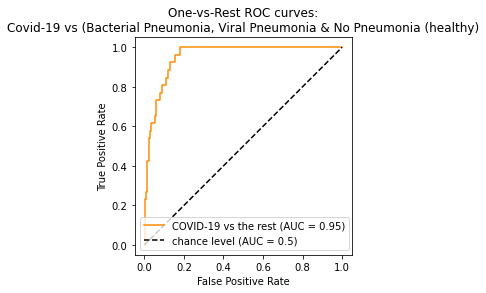

In [87]:
# ROC Covid-19 vs. the rest

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test[:, class_id],
    y_pred[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nCovid-19 vs (Bacterial Pneumonia, Viral Pneumonia & No Pneumonia (healthy)")
plt.legend()
plt.show()

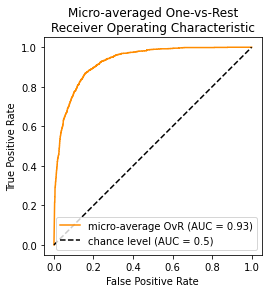

In [91]:
RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.93


In [94]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.93


In [95]:
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(le.classes_)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(le.classes_)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.90


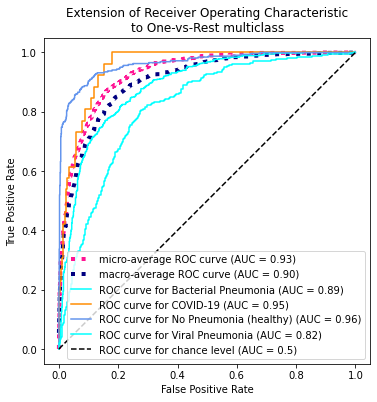

In [98]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(le.classes_)), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {le.classes_[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## Confusion matrix for the validation and test set

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('test_accuracy: %.3f' % (acc))

41/41 [==============================] - 1s 16ms/step
[[492   0   9  64]
 [  2   9   1  14]
 [ 36   0 259  26]
 [144  20  19 186]]
test_accuracy: 0.738


# Adapting/fine-tuning the network

# Transfer Learning